In [1]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd "/content/drive/My Drive/Colab Notebooks/UDEMY_DATA_SCIENCE/PUBLIC RELATIONS"

/content/drive/My Drive/Colab Notebooks/UDEMY_DATA_SCIENCE/PUBLIC RELATIONS


# IMPORT LIBRARIES AND DATASETS

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

In [4]:
reviews_df = pd.read_csv('amazon_alexa.tsv', sep='\t')
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [7]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


# EXPLORE DATASET

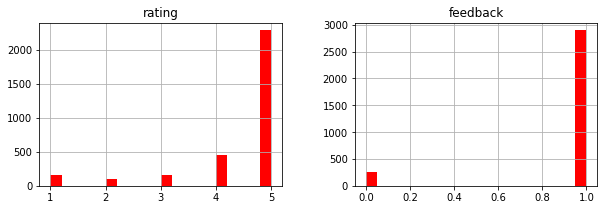

In [27]:
reviews_df.hist(figsize=(10,3), bins=20, color='r')
plt.show()

The dataset has mostly positive feedback (class imbalance)

In [8]:
reviews_df.groupby('rating').feedback.count()

rating
1     161
2      96
3     152
4     455
5    2286
Name: feedback, dtype: int64

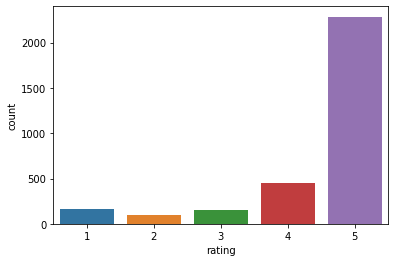

In [34]:
sns.countplot(x='rating', data= reviews_df)

The feedbacks relate to a number of variations of a same device ECHO

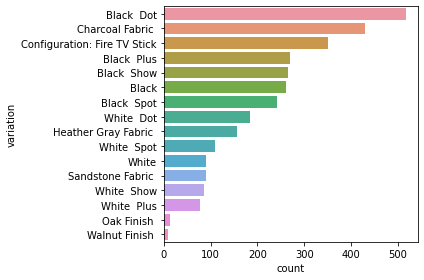

In [51]:
sns.countplot(y='variation', data= reviews_df, orient='v', order = reviews_df['variation'].value_counts().index)
plt.tight_layout()

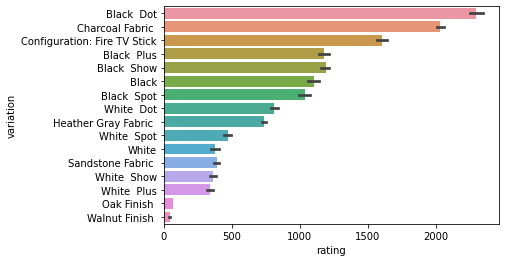

In [85]:
sns.barplot(y='variation', data= reviews_df, x='rating', order = reviews_df['variation'].value_counts().index, estimator=sum, orient='h')  #  hue='rating'

The prevalence of positive feedback is valid accross all variations of the product

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


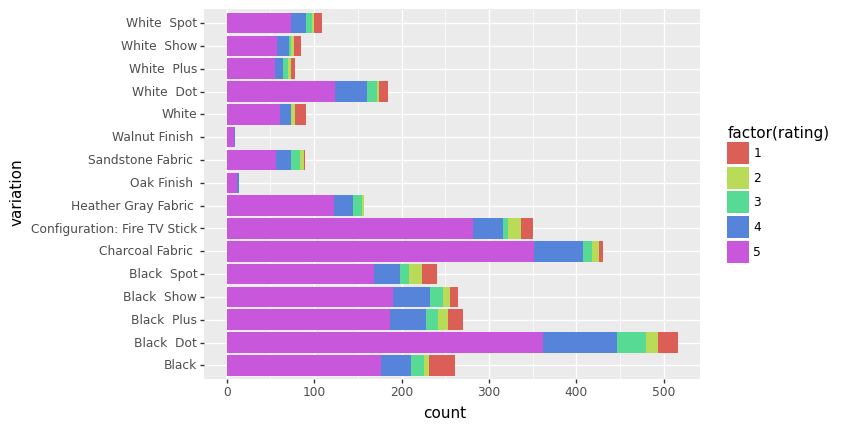

<ggplot: (-9223363242573935770)>

In [113]:
ggplot(reviews_df, aes(x='variation', fill='factor(rating)')) + geom_bar(stat='count') + coord_flip()

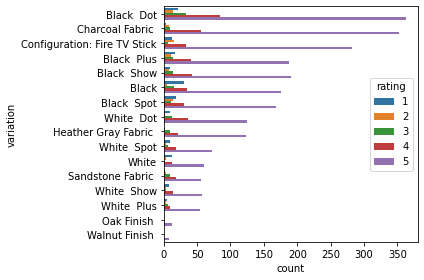

In [58]:
sns.countplot(y='variation', data= reviews_df, orient='v', order = reviews_df['variation'].value_counts().index, hue='rating')
plt.tight_layout()

'feedback' is the Response variable which takes a binary value
- positive is 1

In [114]:
set(reviews_df.feedback)

{0, 1}

Positive feedback gathers all ratings from 3 upwards. Negative feedback are scores 0 or 1.

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


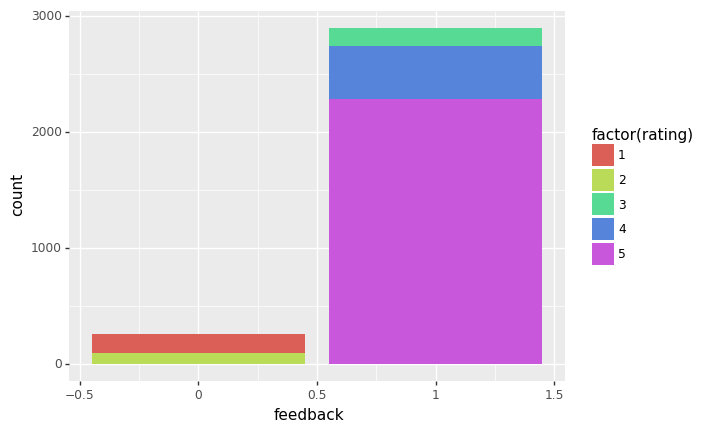

<ggplot: (-9223363269830335200)>

In [18]:
ggplot(reviews_df, aes(x='feedback', fill='factor(rating)')) + geom_bar(stat='count')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


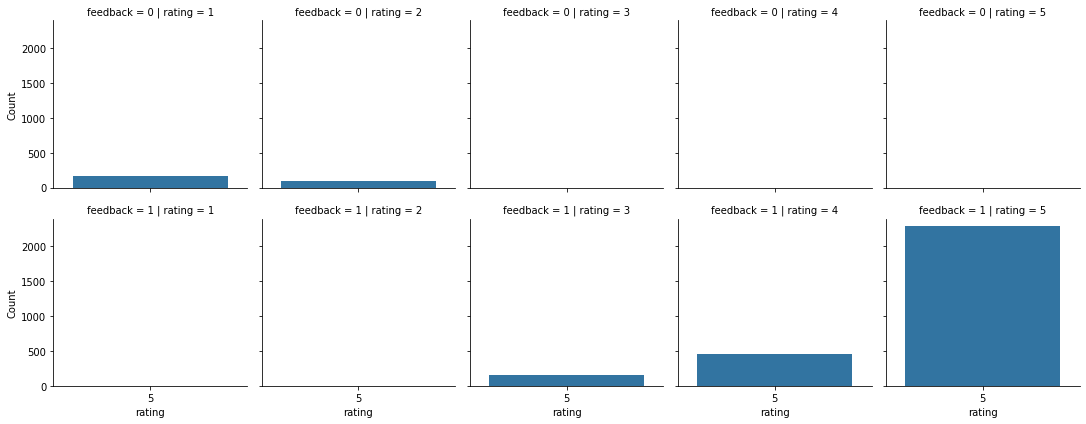

In [19]:
g=sns.FacetGrid(reviews_df, col='rating',row='feedback')
g.map(sns.countplot, 'rating')
g.set_axis_labels("rating", "Count")

In [5]:
reviews_df['length'] = reviews_df.verified_reviews.apply(lambda x: len(x))

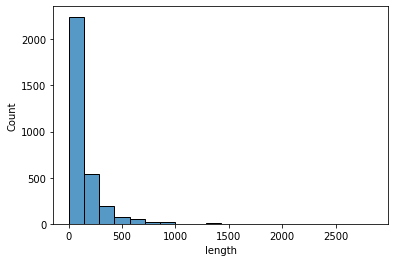

In [29]:
sns.histplot(reviews_df, x='length', bins=20)

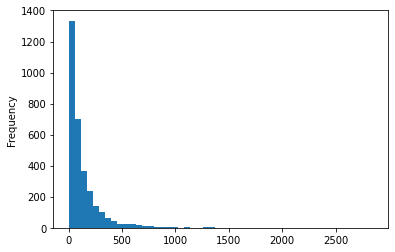

In [31]:
reviews_df.length.plot(kind='hist', bins=50)
plt.show()

Get extreme and mean reviews in length

In [67]:
print('longest review:', reviews_df.length.max(), reviews_df['verified_reviews'].loc[reviews_df.length==max(reviews_df.length)].values)
print('shortest review:', reviews_df.length.min(), reviews_df['verified_reviews'].loc[reviews_df.length==min(reviews_df.length)].iloc[0])
print('mean review:', round(reviews_df.length.mean(),1), reviews_df['verified_reviews'].loc[reviews_df.length==int((reviews_df.length).mean())].sample().values)

longest review: 2851 ["Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This orde

In [61]:
reviews_df.length.describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [63]:
reviews_df[reviews_df.length==2851].verified_reviews.iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [64]:
reviews_df[reviews_df.length==132].verified_reviews.iloc[0]

'Nice. It works good.Some times is not easy to recognize your voice and you have to repeat several times, some time almost screaming.'

In [65]:
reviews_df[reviews_df.length==1].verified_reviews.iloc[0]

'😍'

In [6]:
positive = reviews_df[reviews_df.feedback==1]
negative = reviews_df[reviews_df.feedback==0]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


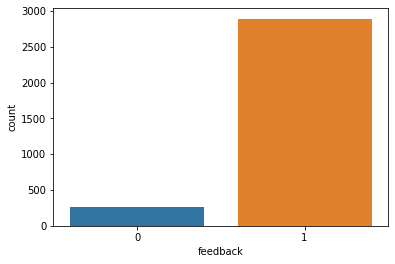

In [70]:
sns.countplot(reviews_df.feedback,label='count')

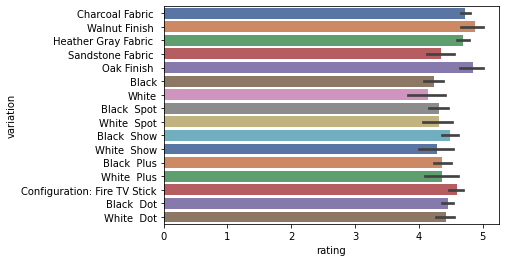

In [94]:
sns.barplot(data=reviews_df, y='variation', x='rating', palette='deep', orient='h')

In [11]:
sentences = reviews_df.verified_reviews.tolist()
sentences = ' '.join(sentences)

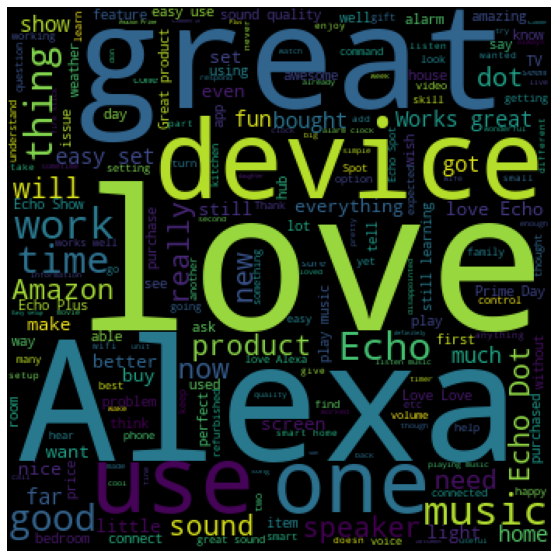

In [42]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
plt.figure(figsize=(10,10))
plt.imshow(WordCloud(stopwords=stopwords, background_color='black', collocations=True, normalize_plurals =True,
                     width=350, height=350).generate(sentences))
plt.axis('off')
plt.show()

Wordcloud for negative reviews

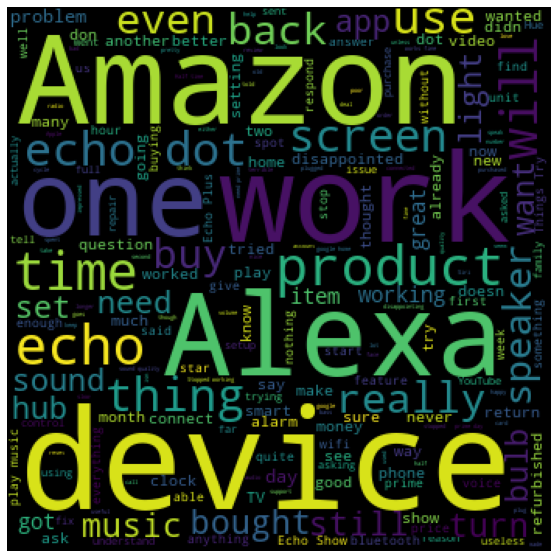

In [41]:
plt.figure(figsize=(10,10))
wordcloud = WordCloud(stopwords=stopwords, background_color='black', collocations=True, normalize_plurals =True,
                      width=350, height=350,).generate(' '.join(negative.verified_reviews.tolist()))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# PERFORM DATA CLEANING

In [43]:
reviews_df.drop(['date', 'rating', 'length'], axis=1, inplace=True)

In [45]:
reviews_df

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [48]:
reviews_df = pd.get_dummies(data=reviews_df, columns=['variation'], drop_first=True)

In [49]:
reviews_df

,verified_reviews,feedback,variation_Black Dot,variation_Black Plus,variation_Black Show,variation_Black Spot,variation_Charcoal Fabric,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,variation_Walnut Finish,variation_White,variation_White Dot,variation_White Plus,variation_White Show,variation_White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# REMOVE PUNCTUATION FROM TEXT

In [50]:
import string
string.punctuation   # all different punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [53]:
test = 'Hi! have you seen bernardt ?? I am looking for him, please tell him.'

In [58]:
no_punctuation = ''.join([letter for letter in test if letter not in string.punctuation])

In [59]:
no_punctuation

'Hi have you seen bernardt  I am looking for him please tell him'

# REMOVE STOPWORDS

In [61]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [65]:
no_punctuation_no_stopwords = ' '.join([word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')])
no_punctuation_no_stopwords

'Hi seen bernardt looking please tell'

In [75]:
pipeline_test = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuation, please go ahead !'

Pipeline

In [76]:
remove_punct = ''.join([char for char in pipeline_test if char not in string.punctuation])
output = ' '.join([word for word in remove_punct.split() if word.lower() not in stopwords.words('english')])
output

'mini challenge teach remove stopwords punctuation please go ahead'

# PERFORM COUNT VECTORIZATION (TOKENIZATION)

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
sample = ['This is the first document', 'This document is the second document', 'And this is the third one', 'Is this the first document?']

In [79]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(sample)

In [80]:
# This is the vocabulary from the corpus submitted
vectorizer.get_feature_names()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [82]:
x

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [81]:
x.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [100]:
vocab = []
for sentence in sample:
  sentence = ''.join([char for char in sentence if char not in string.punctuation])
  #sentence = ' '.join([word.lower() for word in remove_punct.split() if word.lower() not in stopwords.words('english')])
  for word in sentence.split():
    if word.lower() in vocab:
      pass
    else:
      vocab.append(word.lower())
word2index = {word: i for i, word in enumerate(vocab)}

In [101]:
word2index

{'and': 6,
 'document': 4,
 'first': 3,
 'is': 1,
 'one': 8,
 'second': 5,
 'the': 2,
 'third': 7,
 'this': 0}

In [105]:
tokenized = np.zeros((len(sample), len(vocab)),dtype='int')
for i, sentence in enumerate(sample):
  sentence = ''.join([char for char in sentence if char not in string.punctuation])
  #sentence = ' '.join([word.lower() for word in remove_punct.split() if word.lower() not in stopwords.words('english')])
  for word in sentence.split():
    tokenized[i,word2index[word.lower()]]+=1

In [106]:
tokenized

array([[1, 1, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 2, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0]])

# PERFORM DATA CLEANING

In [112]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords
def cleaning(sentence):
  # Remove punct
  remove_punct = ''.join([char for char in sentence if char not in string.punctuation])
  # Remove stopwords
  output = [word.lower() for word in remove_punct.split() if word.lower() not in stopwords.words('english')]
  return output

In [113]:
# Let's test the newly added function
reviews_df.verified_reviews.apply(cleaning)

0                                            [love, echo]
1                                                 [loved]
2       [sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                                 [music]
                              ...                        
3145                    [perfect, kids, adults, everyone]
3146    [listening, music, searching, locations, check...
3147    [love, things, running, entire, home, tv, ligh...
3148    [complaint, sound, quality, isnt, great, mostl...
3149                                               [good]
Name: verified_reviews, Length: 3150, dtype: object

In [115]:
vectorizer = CountVectorizer(analyzer=cleaning)
reviews_vectorized = vectorizer.fit_transform(reviews_df.verified_reviews)

In [124]:
vectorizer.get_feature_names()[400:410]

['array',
 'arrive',
 'arrived',
 'arriving',
 'articles',
 'artist',
 'artistbut',
 'artists',
 'asap',
 'ase']

In [128]:
reviews_vectorized.toarray().shape

(3150, 4488)

In [129]:
y = reviews_df.feedback.values

In [133]:
x = reviews_df.drop(['verified_reviews','feedback'], axis=1).values

In [137]:
x = np.concatenate((x,reviews_vectorized.toarray()), axis=1)

In [139]:
x.shape

(3150, 4503)

# TRAIN A NAIVE BAYES CLASSIFIER MODEL

In [143]:
from sklearn.model_selection import train_test_split

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [144]:
from sklearn.naive_bayes import MultinomialNB

In [162]:
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [160]:
total_count = len(x_train)
weight_positive = (1 / len(positive)) * (total_count) / 2.0
weight_negative = (1 / len(negative)) * (total_count) / 2.0
class_weights = {0: weight_positive, 1: weight_negative}
list(class_weights.values())

[0.43553404770134807, 4.902723735408561]

# ASSESS TRAINED MODEL PERFORMANCE  

In [146]:
from sklearn.metrics import classification_report, confusion_matrix

In [163]:
y_hat_train = NB_classifier.predict(x_train)
y_hat_train

array([1, 1, 1, ..., 1, 1, 1])

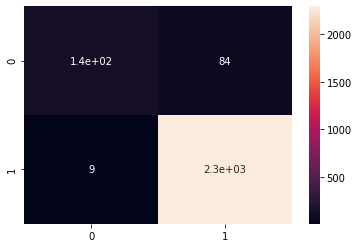

In [164]:
cm = confusion_matrix(y_train, y_hat_train)
sns.heatmap(cm, annot=True)

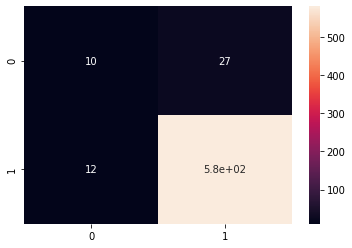

In [165]:
y_hat_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_hat_test)
sns.heatmap(cm, annot=True)

In [166]:
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.45      0.27      0.34        37
           1       0.96      0.98      0.97       593

    accuracy                           0.94       630
   macro avg       0.71      0.63      0.65       630
weighted avg       0.93      0.94      0.93       630



# TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [167]:
from sklearn.linear_model import LogisticRegression

In [183]:
LR_classifier = LogisticRegression()  # class_weight ='balanced'

In [184]:
LR_classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [185]:
y_hat = LR_classifier.predict(x_test)

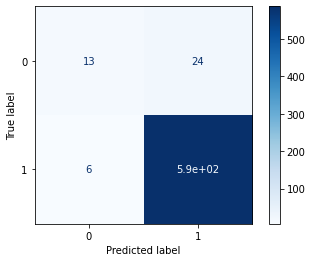

In [186]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LR_classifier, x_test, y_test, normalize=None, cmap="Blues")

In [189]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.68      0.35      0.46        37
           1       0.96      0.99      0.98       593

    accuracy                           0.95       630
   macro avg       0.82      0.67      0.72       630
weighted avg       0.94      0.95      0.95       630

